In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px
import plotly.graph_objects as go
import folium as fl

In [3]:
data = pd.read_csv("/content/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.shape

(48895, 16)

In [5]:
list(data.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [6]:
rental_price = data.loc[:, 'price']

mean_rent = np.mean(rental_price)
print('The average rental price is: $', round(mean_rent, 2))

max_rent = np.max(rental_price)
print('The maximum rental price is: $', round(max_rent, 2))

min_rent = np.min(rental_price)
print('The minimum rental price is: $', round(min_rent, 2))

rent_std = np.std(rental_price)
print('The standard deviation of rental prices is: $', round(rent_std, 2))

median_rent = np.median(rental_price)
print('The median rental price is: $', round(median_rent, 2))

The average rental price is: $ 152.72
The maximum rental price is: $ 10000
The minimum rental price is: $ 0
The standard deviation of rental prices is: $ 240.15
The median rental price is: $ 106.0


In [7]:
region = data.loc[:, 'neighbourhood_group']

unique_regions = pd.unique(region)
print('Number of distinct regions:', unique_regions)


Number of distinct regions: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [8]:
unique_regions_count = data['neighbourhood_group'].value_counts().count()
print('Number of distinct regions:', unique_regions_count)

Number of distinct regions: 5


In [9]:
percent_by_region = round(data['neighbourhood_group'].value_counts(normalize=True) * 100, 2)
percent_by_region

Manhattan        44.30
Brooklyn         41.12
Queens           11.59
Bronx             2.23
Staten Island     0.76
Name: neighbourhood_group, dtype: float64

In [10]:
fig = go.Figure(data=[go.Pie(labels=percent_by_region.index, values=percent_by_region, hole=.3)])

fig.update_traces(textinfo='percent+label', marker=dict(colors=['#636EFA','#EF553B','#00CC96','#AB63FA','#FFA15A'], line=dict(color='#FFFFFF', width=2)))

fig.update_layout(showlegend=False)

fig.show()

In [11]:
price = data.loc[:, 'price']
mean_price = np.mean(price)
rounded_mean = round(mean_price, 2)
print('The average rental prices is: US$', rounded_mean)

The average rental prices is: US$ 152.72


In [12]:
standard_deviation = np.std(price)
rounded_std_dev = round(standard_deviation, 2)
print('The standard deviation of prices is: US$', rounded_std_dev)

The standard deviation of prices is: US$ 240.15


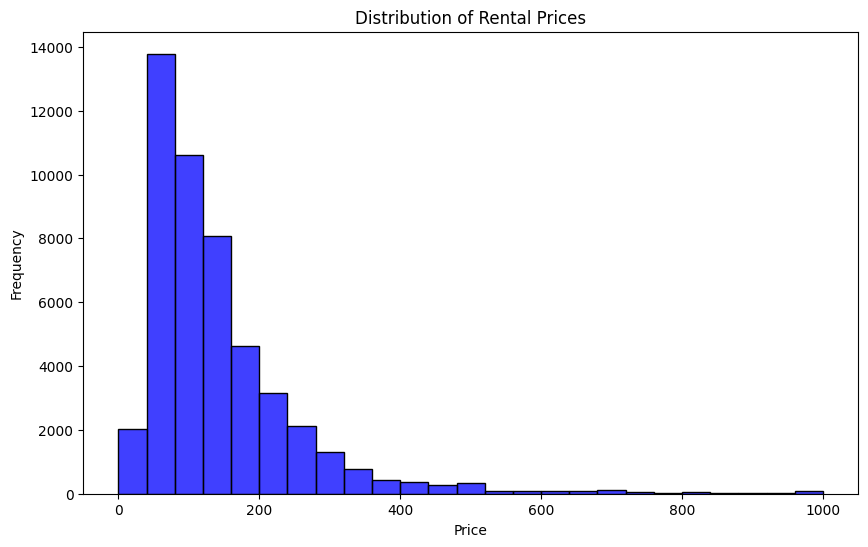

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['price'] <= 1000], x='price', bins="doane", kde=False, color='blue')
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

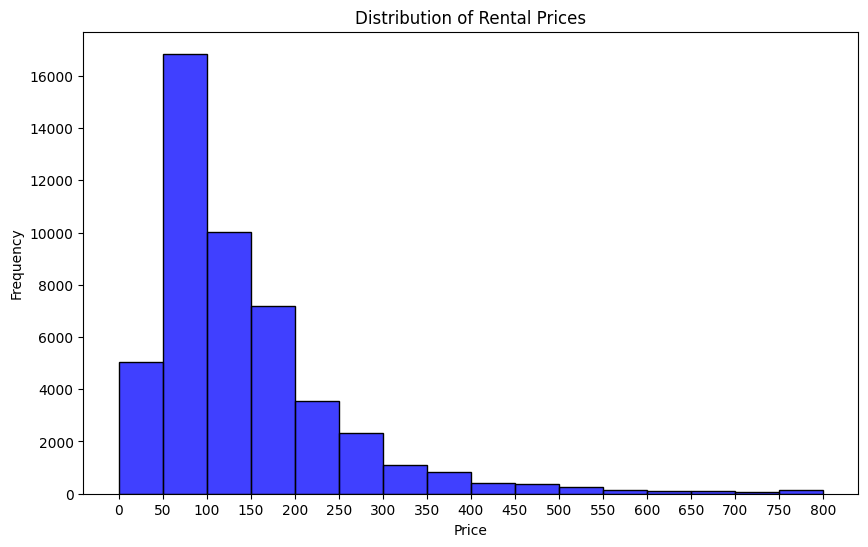

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['price'] <= 800], x='price', binwidth=50, kde=False, color='blue')
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 801, 50))
plt.show()

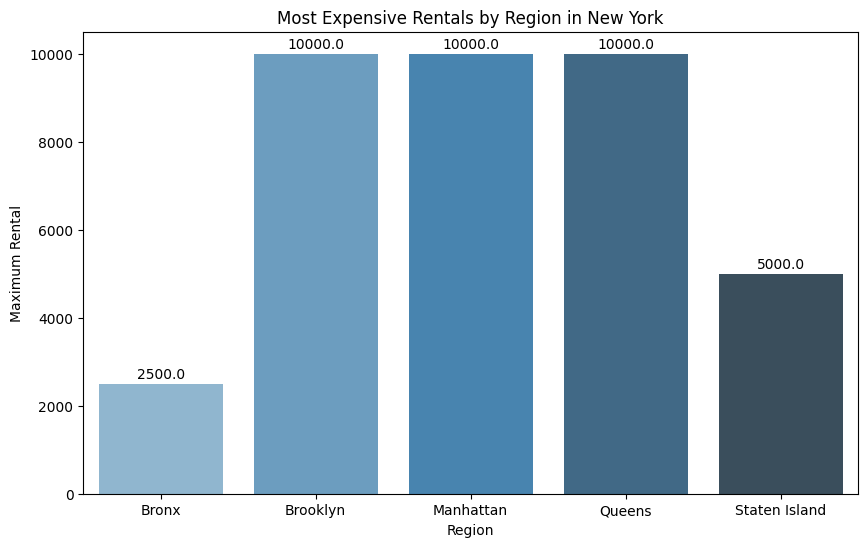

In [15]:
max_rental_by_region = data.loc[:, ['neighbourhood_group', 'price']].groupby('neighbourhood_group').max()

max_rental_by_region = max_rental_by_region.astype(int)

max_rental_by_region.reset_index(inplace=True)

max_rental_by_region.columns = ['Region', 'Maximum Rental']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Region', y='Maximum Rental', data=max_rental_by_region, palette='Blues_d')
plt.title('Most Expensive Rentals by Region in New York')
plt.xlabel('Region')
plt.ylabel('Maximum Rental')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.show()

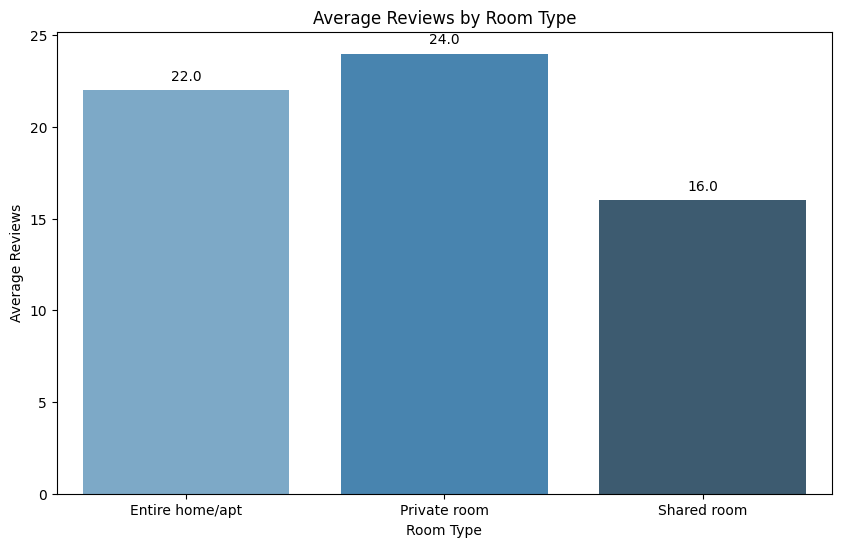

In [16]:
average_reviews_by_type = data.loc[:, ['number_of_reviews', 'room_type']].groupby('room_type').mean()

average_reviews_by_type = average_reviews_by_type.astype(int)

average_reviews_by_type.reset_index(inplace=True)

average_reviews_by_type.columns = ['Room Type', 'Average Reviews']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Room Type', y='Average Reviews', data=average_reviews_by_type, palette='Blues_d')
plt.title('Average Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Reviews')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [17]:
owners_by_region = data.loc[:, ['host_id', 'neighbourhood_group']].groupby('neighbourhood_group').nunique()

fig = px.bar(owners_by_region.reset_index(), x='neighbourhood_group', y='host_id',
             title='Number of Unique Owners by Region',
             labels={'host_id':'Number of Owners', 'neighbourhood_group':'Region'},
             color_discrete_sequence=['#1f77b4'],
             template='plotly_white')

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')

fig.update_yaxes(showticklabels=False)

fig.show()

In [19]:
max_value_region_type = data.loc[:, ['neighbourhood_group', 'room_type', 'price']].groupby(['neighbourhood_group', 'room_type']).max().reset_index()

# Convert the values to integers
max_value_region_type['price'] = max_value_region_type['price'].astype(int)

# Rename the columns for better understanding
max_value_region_type.columns = ['Region', 'Type', 'Maximum Value']

import plotly.express as px

fig = px.bar(max_value_region_type, x='Maximum Value', y='Region', color='Type', orientation='h',
             labels={'Maximum Value':'Maximum Rental Price', 'Region':'Region', 'Type':'Room Type'},
             title='Maximum Rental Price by Region and Room Type in New York City')

fig.update_traces(texttemplate='%{x:.0f}', textposition='inside')
fig.show()